# Mkopa amount paid prediction
# This is a regression problem 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from pandas_profiling import ProfileReport

In [2]:
mkopa=pd.read_csv("Data Science assessment.csv")

In [3]:
mkopa.head()

Product CustomerGender    Location    Region  TotalPrice   StartDate  \
0  Product B           Male  Location 2  Region 2       16600    7/4/2014   
1  Product B           Male  Location 3  Region 3       16600    1/2/2015   
2  Product C         Female  Location 5  Region 5       15600   12/8/2012   
3  Product B           Male  Location 6  Region 1       16600   2/20/2015   
4  Product D         Female  Location 7  Region 2       20250  10/28/2013   

   Deposit  DailyRate  TotalDays  AmountPaid30  AmountPaid60  AmountPaid360  \
0     2000         40        365          3121          4241          13621   
1     2000         40        365          3061          4171          15041   
2     1000         40        365          2160          3280          15340   
3     2000         40        365          3041          4241          15321   
4     2000         50        365          3470          4820          13720   

  LoanStatus360  
0        Active  
1        Active  
2        Active  
3        Active  
4        Active

# Data Analysis 

In [4]:
ProfileReport(mkopa)

# Data Visualization
# There are various trends: many customers pay up their loans,customers who buy product F have a likelihood to pay up their loan,all genders have a likelihood to pay up the loans

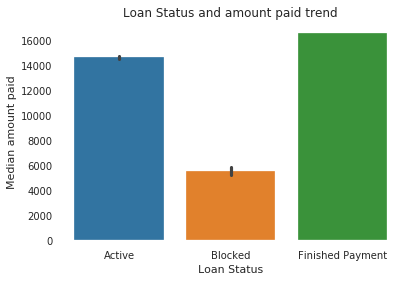

In [5]:
ax = sns.barplot(x='LoanStatus360', y='AmountPaid360', estimator=np.median, data=mkopa)
ax.set(xlabel='Loan Status',
       ylabel='Median amount paid',
       title='Loan Status and amount paid trend')
plt.show()

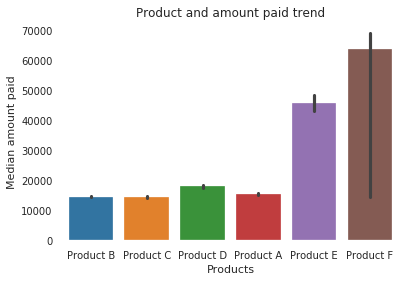

In [6]:
ax = sns.barplot(x='Product', y='AmountPaid360', estimator=np.median,data=mkopa)
ax.set(xlabel='Products',
       ylabel='Median amount paid',
       title='Product and amount paid trend')
plt.show()

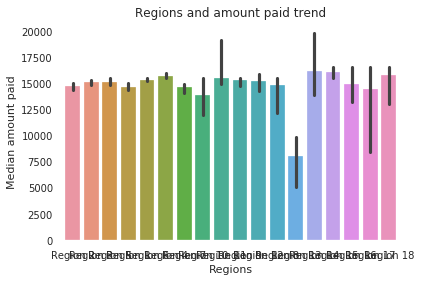

In [7]:
ax = sns.barplot(x='Region', y='AmountPaid360',estimator=np.median, data=mkopa)
ax.set(xlabel='Regions',
       ylabel='Median amount paid',
       title='Regions and amount paid trend')
plt.show()

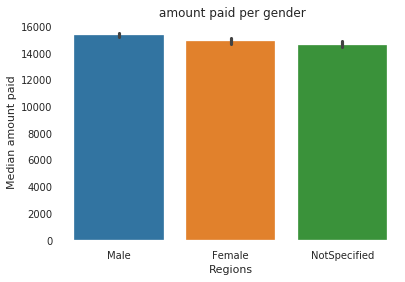

In [8]:
ax = sns.barplot(x='CustomerGender', y='AmountPaid360', estimator=np.median, data=mkopa)
ax.set(xlabel='Regions',
       ylabel='Median amount paid',
       title=' amount paid per gender')
plt.show()

# Data Preprocessing-Coverting Categorical Data to numerical data

In [9]:
#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le=LabelEncoder()
mkopa['LoanStatus360']=le.fit_transform(mkopa['LoanStatus360'])
mkopa['CustomerGender']=le.fit_transform(mkopa['CustomerGender'])
# Specify categorical columns then convert them into numerical variables using one hot encoding
cat_cols = ['Product','Region']
mkopa = pd.get_dummies(mkopa, columns=cat_cols)


In [10]:
#Dropping the high cardinality attributes
mkopa.drop(['StartDate','Location'],axis=1,inplace=True)


# Feature Selection
# Decided to leave out dailyrate,totaldays and deposit since totalprice=(dailyrate*totaldays)+deposit and left out customergender since its weak feature

In [11]:
ignored_columns=['AmountPaid360','DailyRate','CustomerGender','TotalDays','Deposit']
#splitting the data into training and testing set in 80:20 ratio
y=mkopa['AmountPaid360']
x=mkopa.drop(ignored_columns,axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# Model Development

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [14]:
#Evaluating the error
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr) # Mean Absolute Error
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr) #Mean Squared error
lr_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_lr))
lr_r2 = metrics.r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('Mean Absolute Error', lr_mae)
print('Mean Squared Error', lr_mse)
print('Root Mean Squared Error',lr_rmse)
print('R2 Score',lr_r2)

Linear Regression
Mean Absolute Error 3245.9050686553273
Mean Squared Error 16726226.140541967
Root Mean Squared Error 56.97284501106933
R2 Score 0.6391334414050864


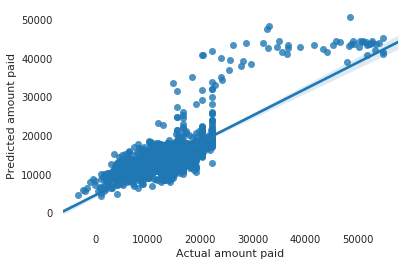

In [15]:
ax = sns.regplot(x=y_test, y = y_pred_lr)

ax.set(xlabel = 'Actual amount paid',
       ylabel = 'Predicted amount paid')
plt.show()

In [16]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [17]:
rf_mae = metrics.mean_absolute_error(y_test,y_pred_rf)

rf_mse = metrics.mean_squared_error(y_test,y_pred_rf)

rf_rmse = np.sqrt(rf_mse)

rf_r2 = metrics.r2_score(y_test, y_pred_rf)

print ('Random Forest Analysis')
print('Mean Absolute Error;',rf_mae)
print('Mean Squared Error;', rf_mse)
print('Root Mean Squared Error;', rf_rmse)
print('R2;', rf_r2)

Random Forest Analysis
Mean Absolute Error; 1939.1936520247348
Mean Squared Error; 8339203.04264096
Root Mean Squared Error; 2887.767830460226
R2; 0.8200825770179042


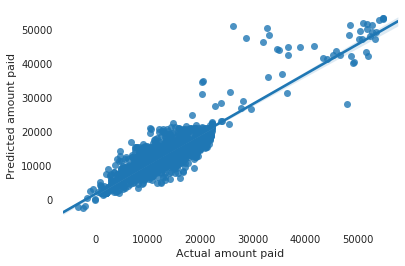

In [18]:
ax = sns.regplot(x=y_test, y = y_pred_rf)

ax.set(xlabel = 'Actual amount paid',
       ylabel = 'Predicted amount paid')
plt.show()

In [19]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [20]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)
dt_mse = metrics.mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_dt))
dt_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Decision Tree')
print('Mean Absolute Error', dt_mae)
print('Mean Squared Error', dt_mse)
print('Root Mean Squared Error',dt_rmse)
print('R2 Score',dt_r2)

Decision Tree
Mean Absolute Error 2396.396554971665
Mean Squared Error 14482101.912244597
Root Mean Squared Error 48.95300353371246
R2 Score 0.6875501841012901


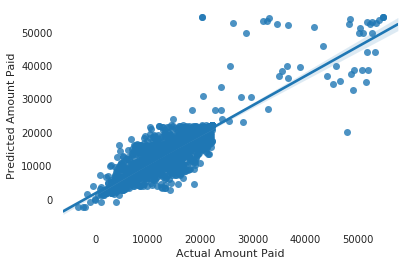

In [21]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual Amount Paid',
      ylabel = 'Predicted Amount Paid')
plt.show()

In [22]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)


In [23]:
knn_mae = metrics.mean_absolute_error(y_test, y_pred_knn)
knn_mse = metrics.mean_squared_error(y_test,y_pred_knn)
knn_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_knn))
knn_r2 = metrics.r2_score(y_test, y_pred_knn)

print('Decision Tree')
print('Mean Absolute Error', knn_mae)
print('Mean Squared Error', knn_mse)
print('Root Mean Squared Error',knn_rmse)
print('R2 Score',knn_r2)

Decision Tree
Mean Absolute Error 2546.6033170201194
Mean Squared Error 12847424.374728113
Root Mean Squared Error 50.4638813114897
R2 Score 0.7228181789507767


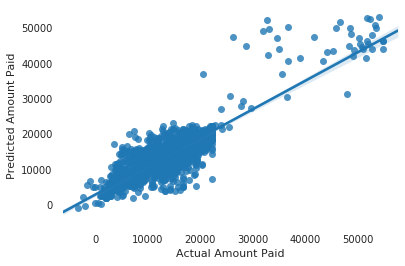

In [24]:
ax = sns.regplot(x = y_test, y = y_pred_knn)
ax.set(xlabel = 'Actual Amount Paid',
      ylabel = 'Predicted Amount Paid')
plt.show()

# The random forest regressor has best results (R2 score of 0.81)